# Approximation with a linear model

Here, we visualy demonstrate that an overparameterized network can be well approximated around a random inital point with a linearized model.

In [1]:
import matplotlib.pyplot as plt
#%matplotlib notebook
#import matplotlib.pyplot as plt
from numpy import *
import numpy as np

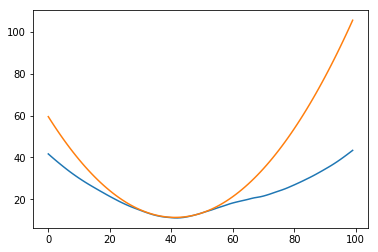

In [46]:
# generator network

n = 10
k = 100   
v = np.ones(k)
v[:int(k/2)] = -np.ones( int(k/2) )
v = v/np.sqrt(k)
U = np.eye(n)

def G(C):    
    return np.maximum( U @ C , 0 ) @ v

# Jaccobian
def J(C):
    return np.vstack( [ve * (U.T @ np.diag(c > 0)) for ve,c in zip(v,C.T)] ).T
    
# original loss
def loss(y,C):
    return np.linalg.norm( y - G(C) )**2

# associated linearized loss
def losslin(y,C,C0):
    return np.linalg.norm( G(C0) + J(C0) @ np.hstack((C-C0).T)  - y )**2



y = np.random.randn(n)

# initial vector
C0 = np.random.randn(n,k)

# random direction
Crand = np.random.randn(n,k)

R = 3
epsilons = np.linspace(-R,R,100)


losses = [loss(y, C0+ep*Crand) for ep in epsilons]
linlosses = [losslin(y, C0+ep*Crand,C0) for ep in epsilons]


plt.plot(losses)
plt.plot(linlosses)
plt.show()